<a href="https://colab.research.google.com/github/genuguru/IT7143/blob/main/IT7143_genuguru_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Set Up Your Environment**
First, you need to set up your environment in Google Colab. This includes installing necessary libraries and authenticating your Google Cloud account.

In [27]:
# Install the Google Cloud BigQuery library
!pip install google-cloud-bigquery

**Step 2: Authenticate Your Google Account**
You need to authenticate your Google account to access BigQuery.

In [28]:
from google.colab import auth
auth.authenticate_user()

print("Aunthenticated")

# Set up the BigQuery client
from google.cloud import bigquery


Aunthenticated


In [29]:
#associate with a create project id
project_id = 'it7143-cloud-analytics'

#ASSOCIATE bigquery client and the project
client = bigquery.Client(project=project_id)

In [30]:
#importing the packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Step 3: Query a Public Dataset**
BigQuery has many public datasets that you can explore. For this example, let's query the USA Names dataset, which contains information about names in the US.

In [31]:
# Define the SQL query
# Question 1 : 1a)Query for Crime rates by year
query1a = """ SELECT EXTRACT(YEAR FROM date) AS year,count(*) AS crimecount
FROM bigquery-public-data.chicago_crime.crime GROUP BY year order by year DESC """

# Execute the query via the client
query_job = client.query(query1a)

# Get the result
results = query_job.result()

# Convert the query result to a pandas DataFrame
df1a = results.to_dataframe()

# Display the DataFrame
print(df1a)


    year  crimecount
0   2024      103288
1   2023      261957
2   2022      239401
3   2021      209231
4   2020      212422
5   2019      261474
6   2018      269011
7   2017      269175
8   2016      269894
9   2015      264843
10  2014      275834
11  2013      307563
12  2012      336332
13  2011      352009
14  2010      370538
15  2009      392841
16  2008      427197
17  2007      437089
18  2006      448188
19  2005      453779
20  2004      469431
21  2003      475989
22  2002      486820
23  2001      485914


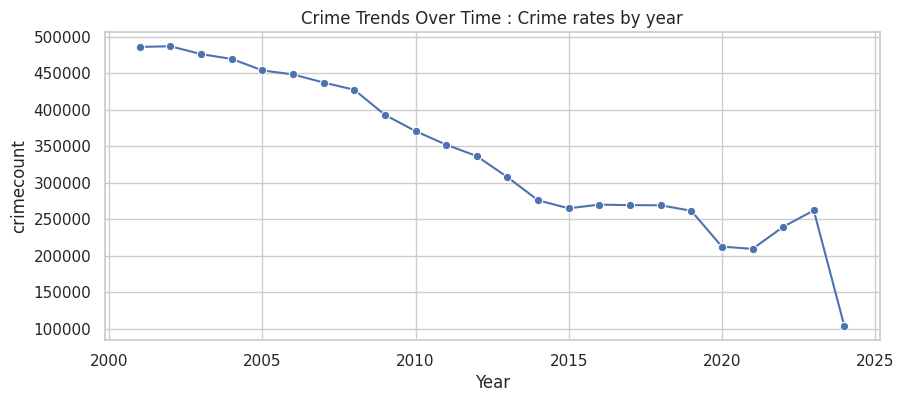

In [32]:
# Question 1 : 1a)Plot for Crime rates by year
plt.figure(figsize=(10, 4))
line_plot = sns.lineplot(x='year', y='crimecount', data=df1a, marker='o')
line_plot.set_title('Crime Trends Over Time : Crime rates by year')
line_plot.set_xlabel('Year')
line_plot.set_ylabel('crimecount')
plt.show()

In [33]:
# Define the SQL query
# Question 1 : 1b)Query for Monthly distribution for the current year
query1b = """ SELECT EXTRACT(MONTH FROM date) AS MONTH, COUNT(*) AS TOTAL_CRIMES FROM `bigquery-public-data.chicago_crime.crime`
WHERE EXTRACT(YEAR FROM date) = EXTRACT(YEAR FROM CURRENT_DATE())  GROUP BY MONTH ORDER BY MONTH """

# Execute the query via the client
query_job = client.query(query1b)

# Get the result
results = query_job.result()

# Convert the query result to a pandas DataFrame
df1b = results.to_dataframe()

# Display the DataFrame
print(df1b)

   MONTH  TOTAL_CRIMES
0      1         19352
1      2         19721
2      3         20640
3      4         20058
4      5         22102
5      6          1415


**Step 4: Load Results into a DataFrame**
For easier data manipulation, load the results into a Pandas DataFrame.

**Step 5: Perform Analysis**
You can now perform further analysis on the DataFrame. For instance, you can plot the data to visualize the most common names.

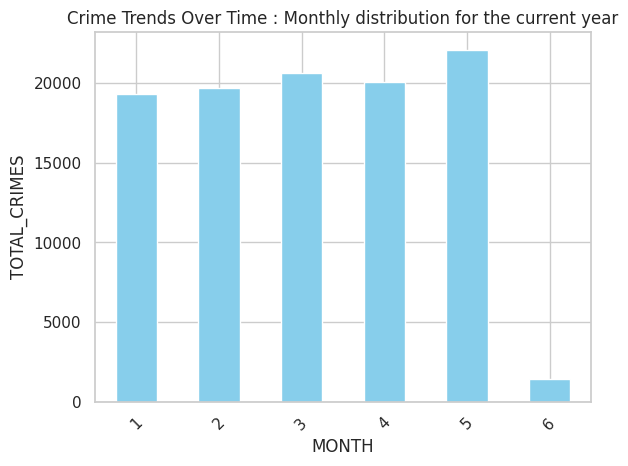

In [34]:
# Question 1 : 1b)Plot the Monthly distribution for the current year
df1b.plot(kind='bar', x='MONTH', y='TOTAL_CRIMES', color='skyblue', legend=None)
plt.title('Crime Trends Over Time : Monthly distribution for the current year')
plt.xlabel('MONTH')
plt.ylabel('TOTAL_CRIMES')
plt.xticks(rotation=45)
plt.show()

In [35]:
# Define the SQL query
# Question 1 : 1c)Query for Peak times for different types of crimes during the day and week
# Output of this block gives grouped data based on each crime type, day_of_week and hour

query1c = """ SELECT
  primary_type,
  EXTRACT(DAYOFWEEK FROM date) AS day_of_week,
  EXTRACT(HOUR FROM date) AS hour,
  COUNT(*) AS crime_count
FROM
  `bigquery-public-data.chicago_crime.crime`
GROUP BY
  primary_type, day_of_week, hour
ORDER BY
  primary_type, crime_count DESC """

# Execute the query via the client
query_job = client.query(query1c)

# Get the result
results = query_job.result()

# Convert the query result to a pandas DataFrame
df1c = results.to_dataframe()

# Display the DataFrame
print(df1c)

           primary_type  day_of_week  hour  crime_count
0                 ARSON            7     3          246
1                 ARSON            7    12          234
2                 ARSON            2    12          232
3                 ARSON            7     1          231
4                 ARSON            1     3          228
...                 ...          ...   ...          ...
2674  WEAPONS VIOLATION            6     5          748
2675  WEAPONS VIOLATION            4     5          736
2676  WEAPONS VIOLATION            5     5          706
2677  WEAPONS VIOLATION            2     5          701
2678  WEAPONS VIOLATION            3     5          688

[2679 rows x 4 columns]


In [36]:
# Output of this block gives Peak times during the day and during the week for each crime type along with the max crime count.

# List of unique crime types
crime_types = df1c['primary_type'].unique()

# Function to find peak times for each crime type
def find_peak_times_for_crime_type(crime_type):
    df_filtered = df1c[df1c['primary_type'] == crime_type]

    # Group by day of week and hour, then sum the crime counts
    peak_times = df_filtered.groupby(['day_of_week', 'hour'])['crime_count'].sum().reset_index()

    # Find the peak day and hour
    peak_day = peak_times.loc[peak_times['crime_count'].idxmax()]['day_of_week']
    peak_hour = peak_times.loc[peak_times['crime_count'].idxmax()]['hour']
    max_crimes = peak_times['crime_count'].max()

    return crime_type, peak_day, peak_hour, max_crimes

# Find peak times for each crime type
peak_times_list = [find_peak_times_for_crime_type(crime_type) for crime_type in crime_types]

# Convert to DataFrame for better readability
df_peak_times_summary = pd.DataFrame(peak_times_list, columns=['Crime Type', 'Peak Day of Week', 'Peak Hour', 'Max Crime Count'])

# Display the peak times summary
print(df_peak_times_summary)

                           Crime Type  Peak Day of Week  Peak Hour  \
0                               ARSON                 7          3   
1                             ASSAULT                 4          9   
2                             BATTERY                 1          2   
3                            BURGLARY                 2          8   
4   CONCEALED CARRY LICENSE VIOLATION                 7         11   
5                 CRIM SEXUAL ASSAULT                 1         12   
6                     CRIMINAL DAMAGE                 1         12   
7             CRIMINAL SEXUAL ASSAULT                 7         12   
8                   CRIMINAL TRESPASS                 4          9   
9                  DECEPTIVE PRACTICE                 2         12   
10                  DOMESTIC VIOLENCE                 5          2   
11                           GAMBLING                 6          7   
12                           HOMICIDE                 1          1   
13                  

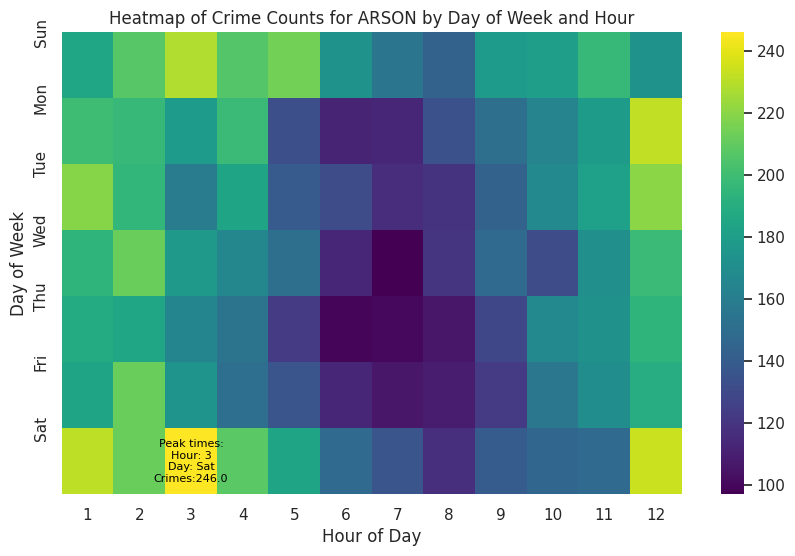

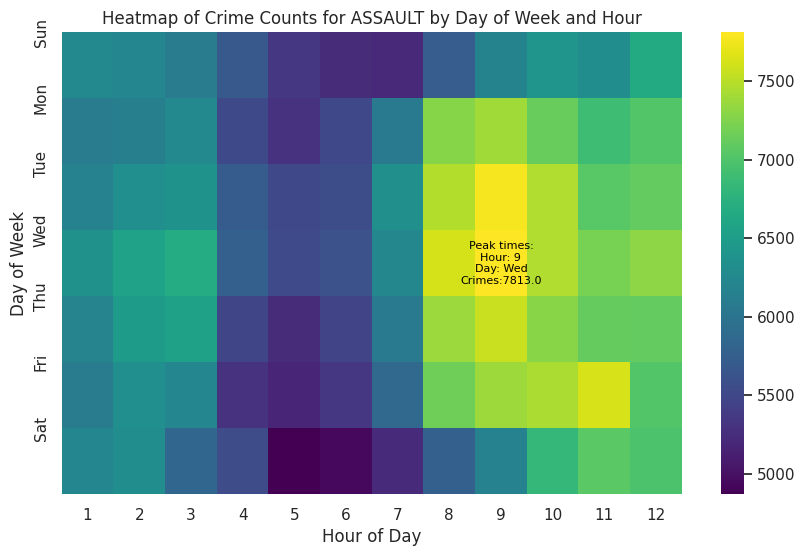

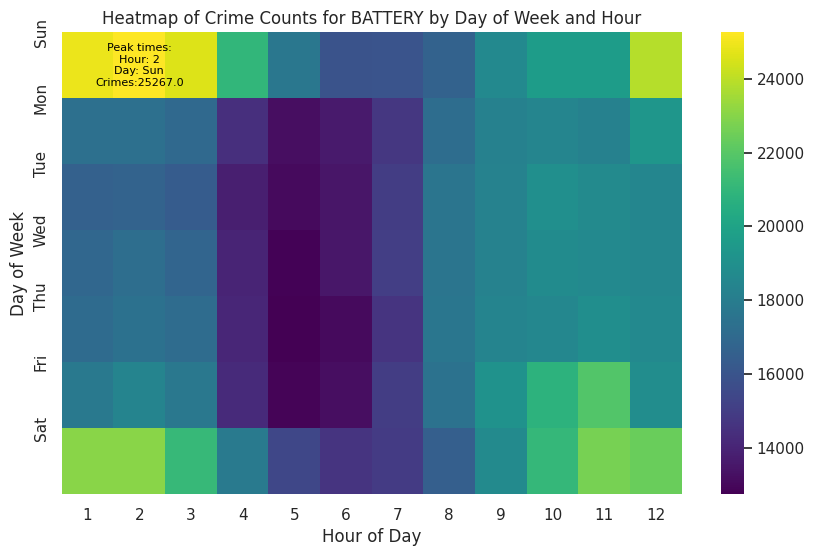

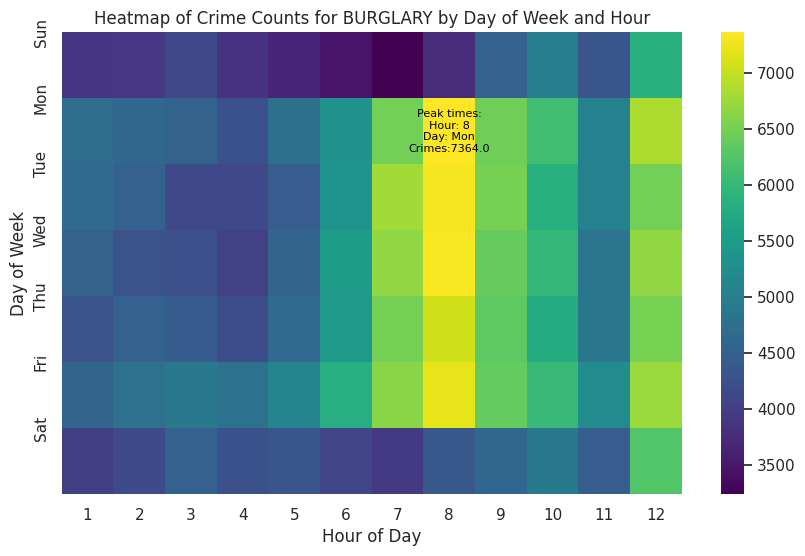

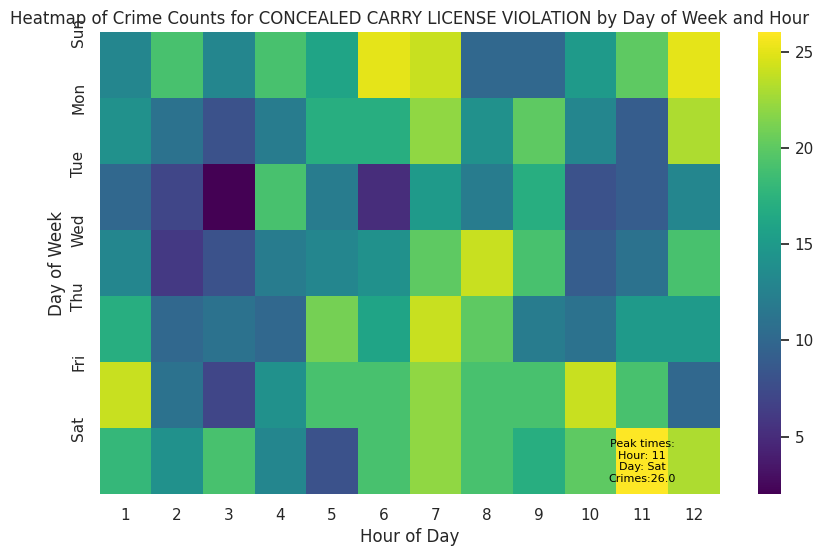

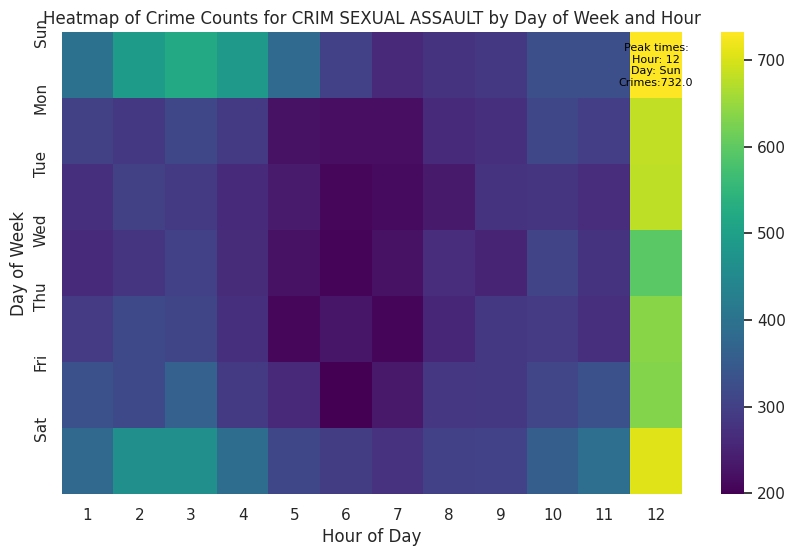

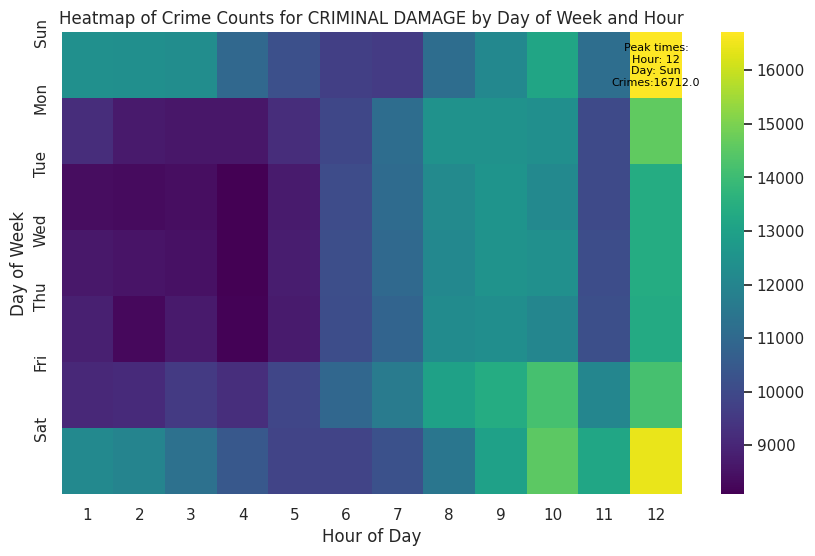

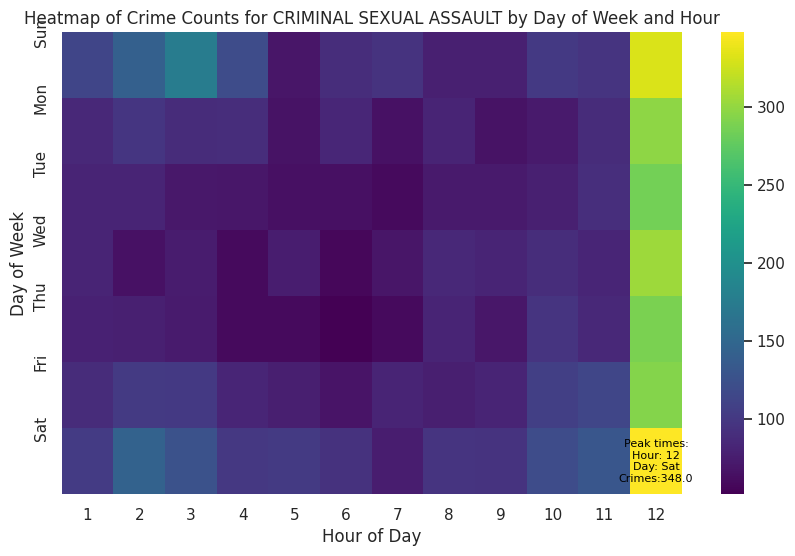

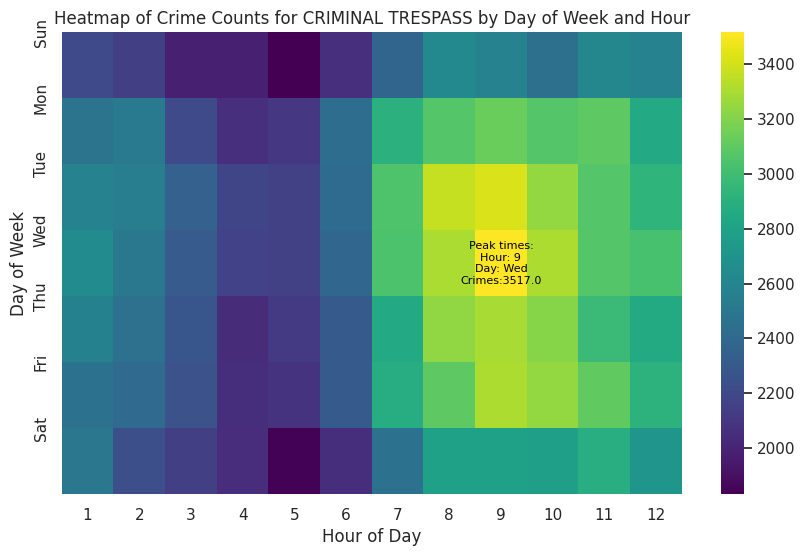

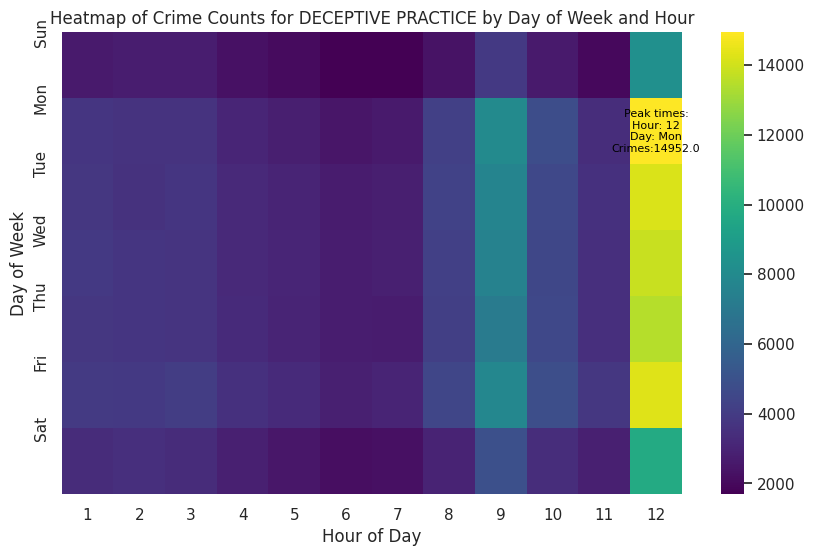

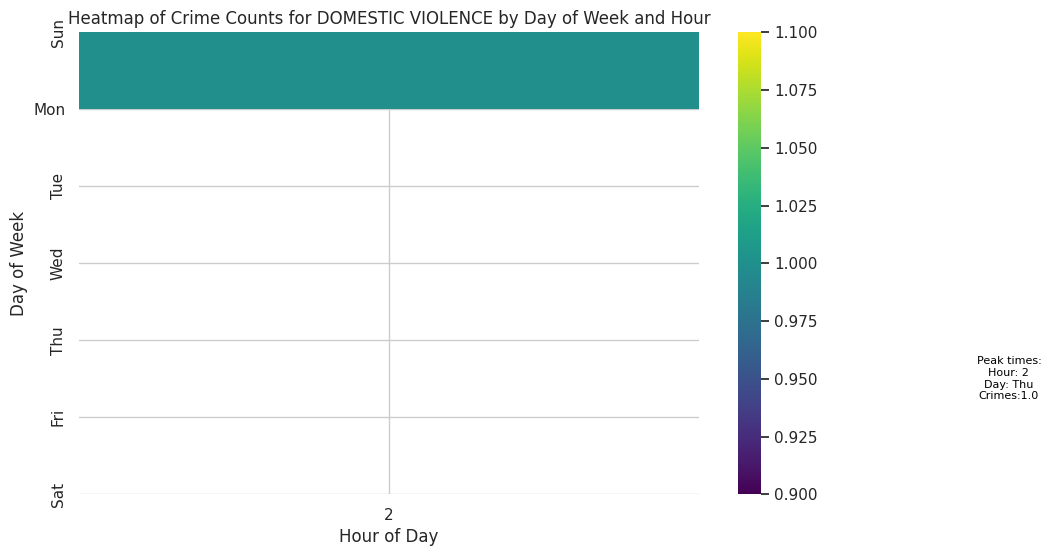

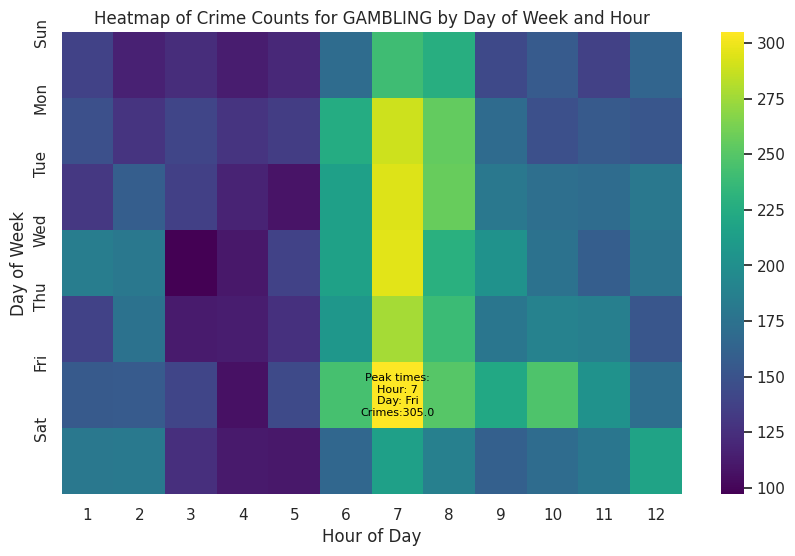

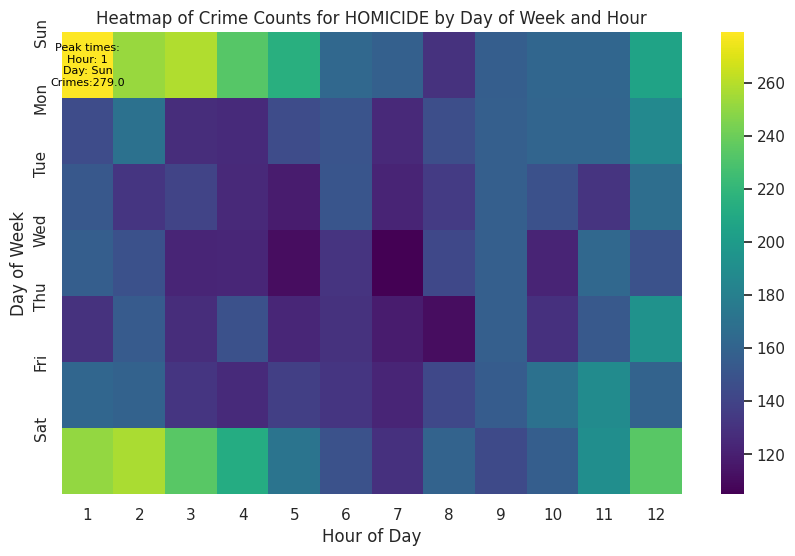

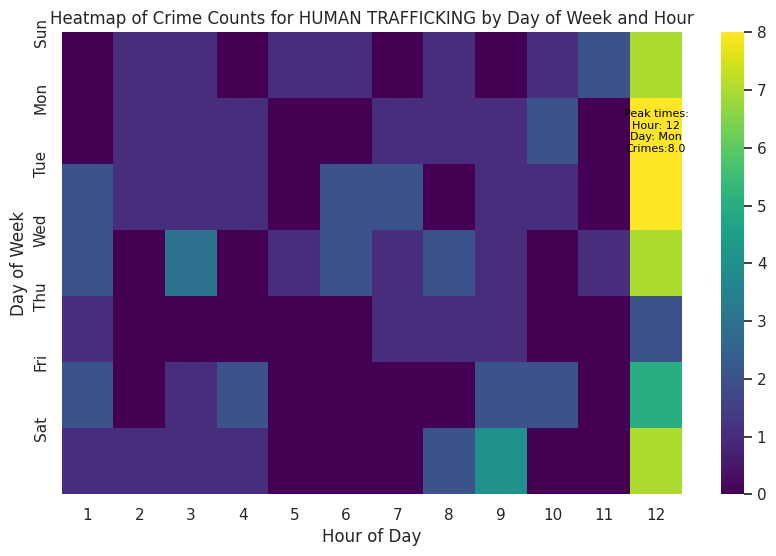

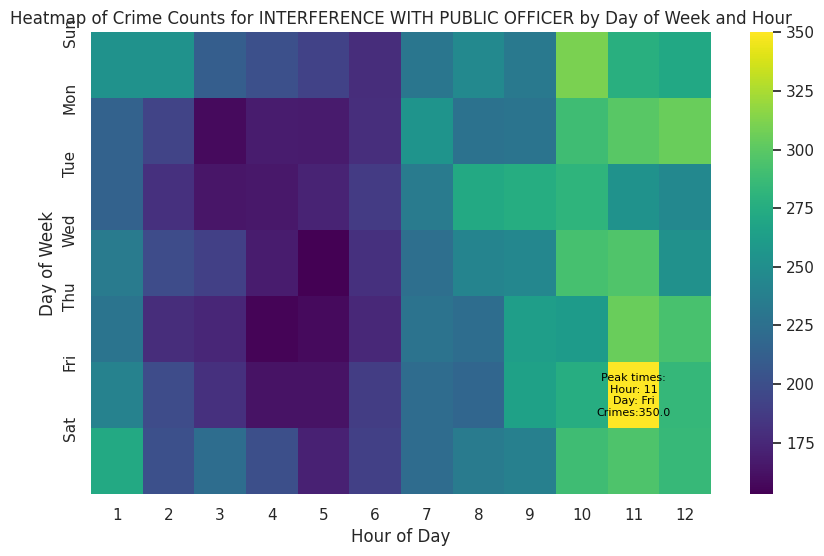

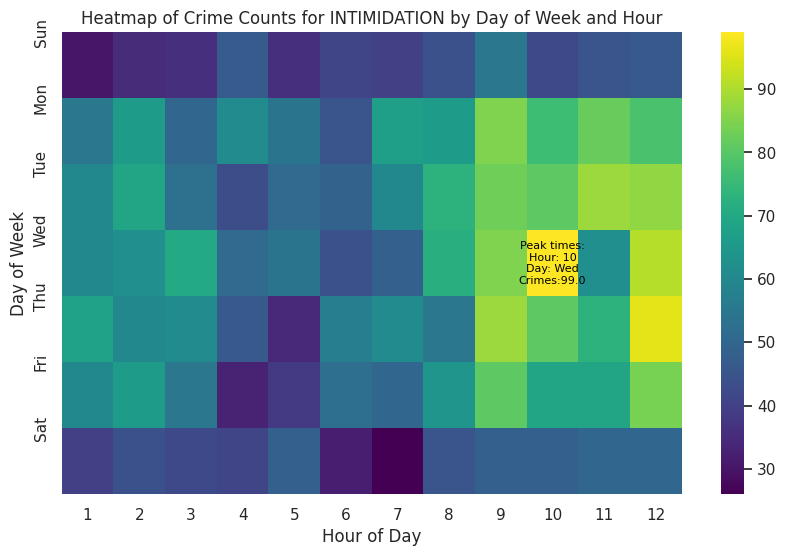

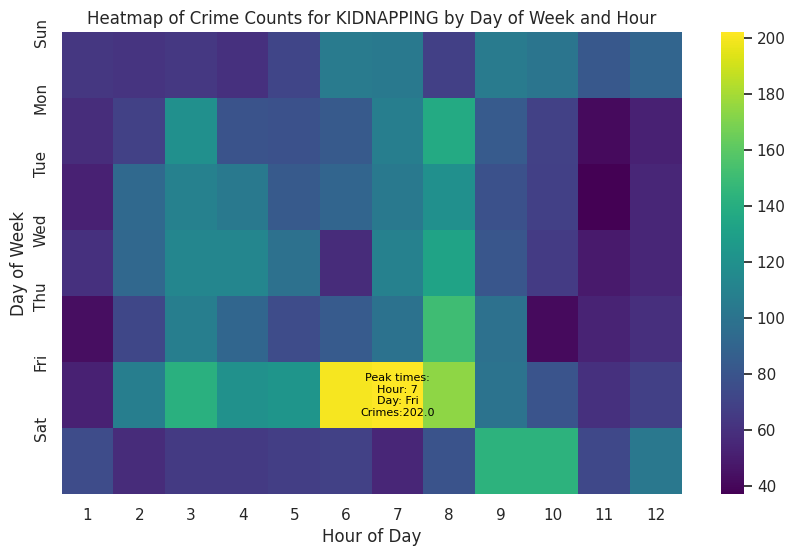

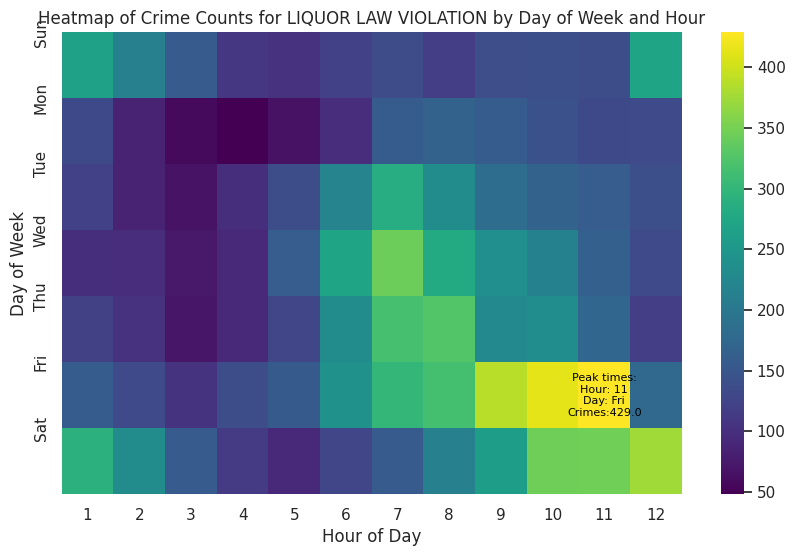

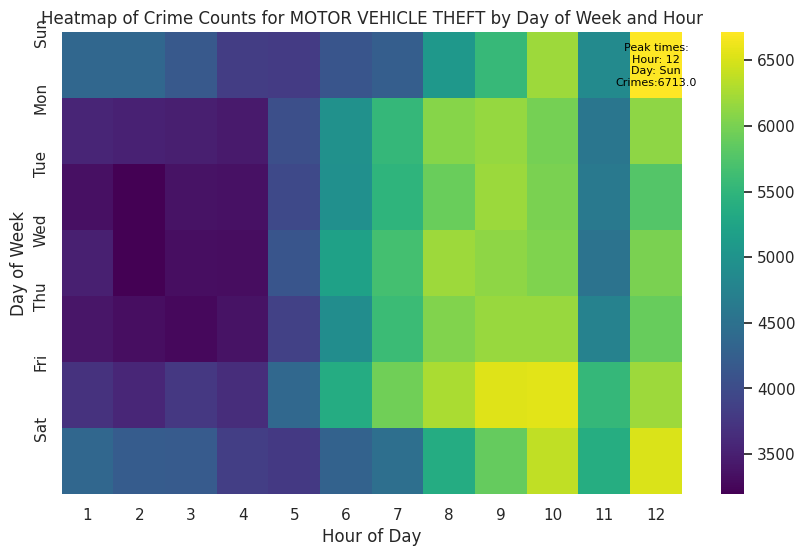

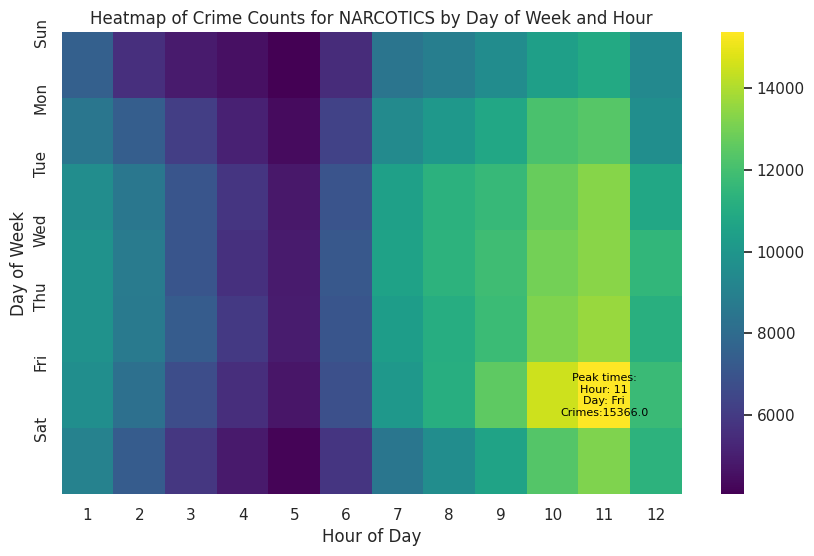

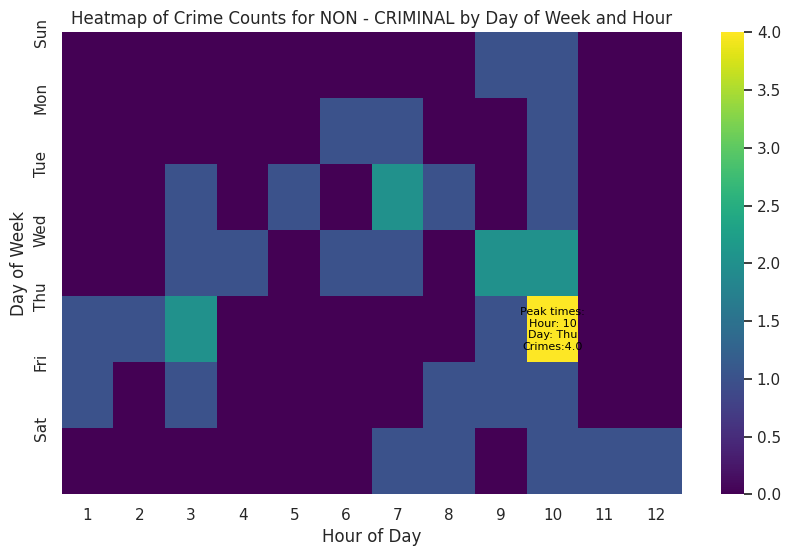

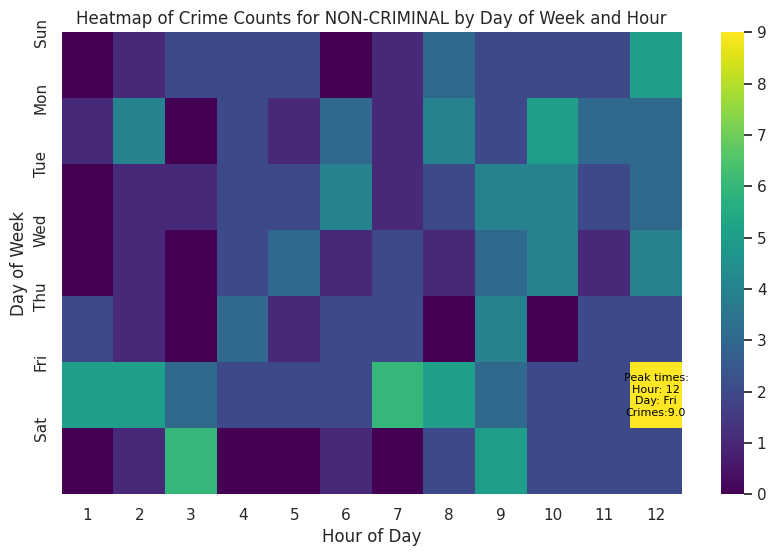

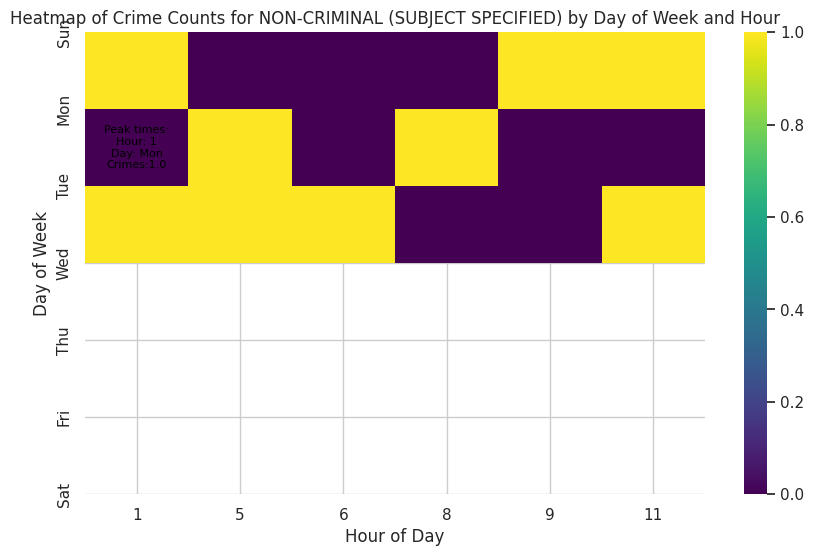

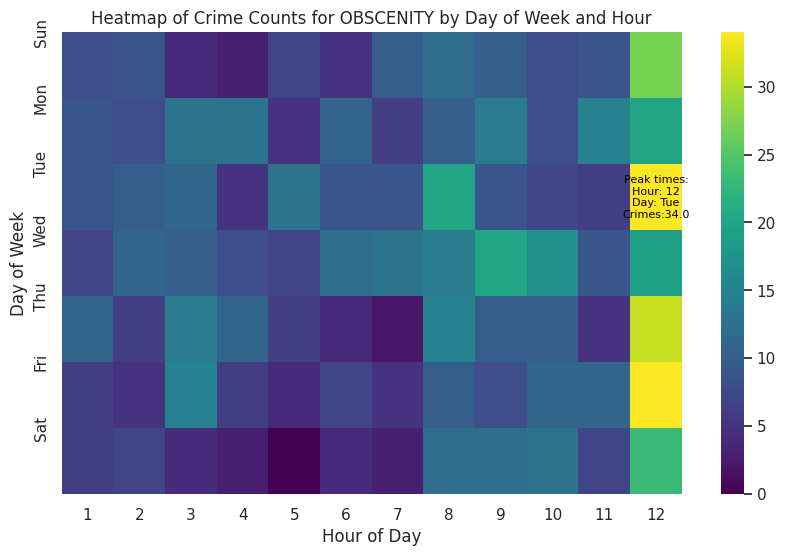

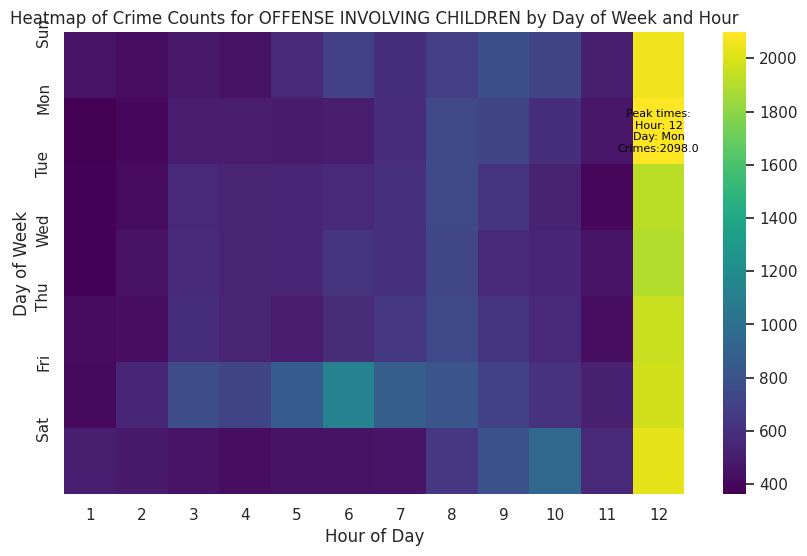

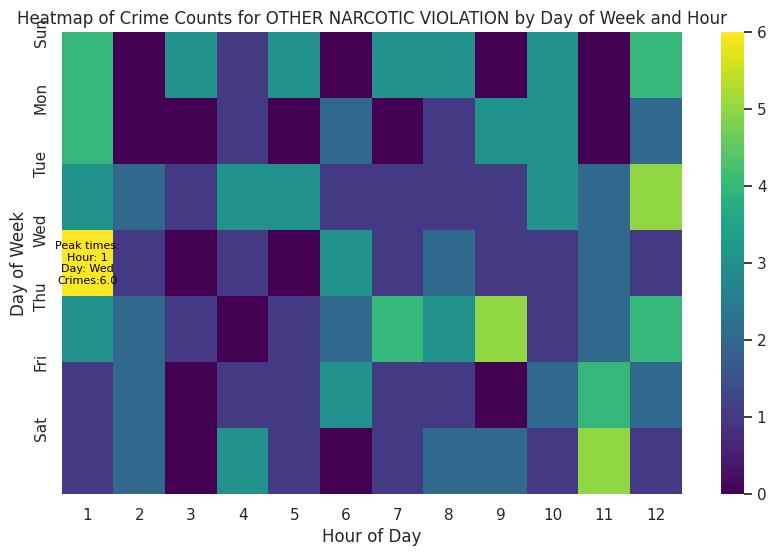

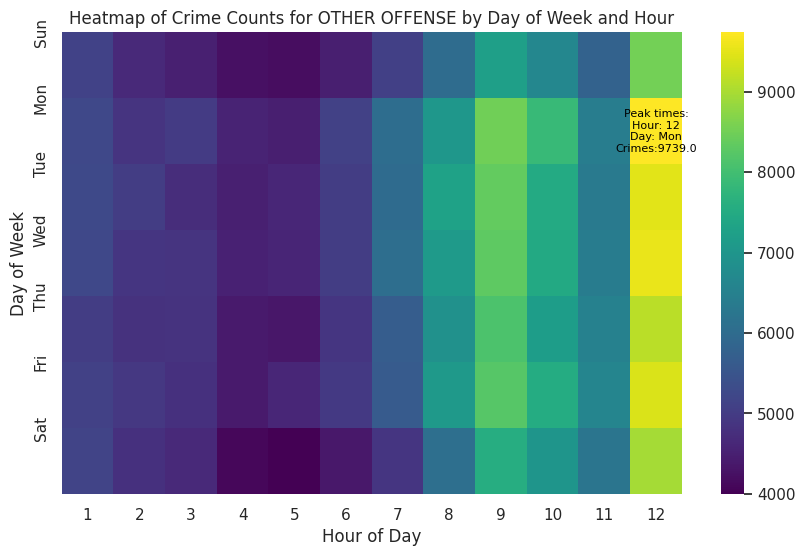

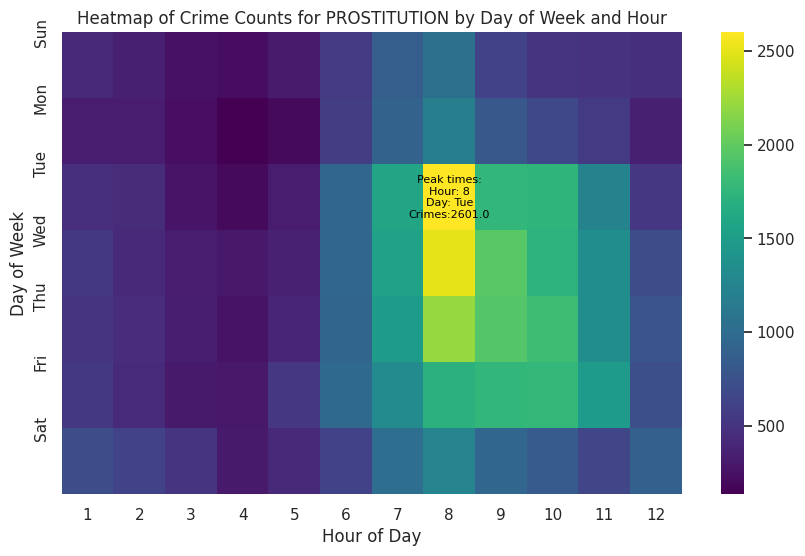

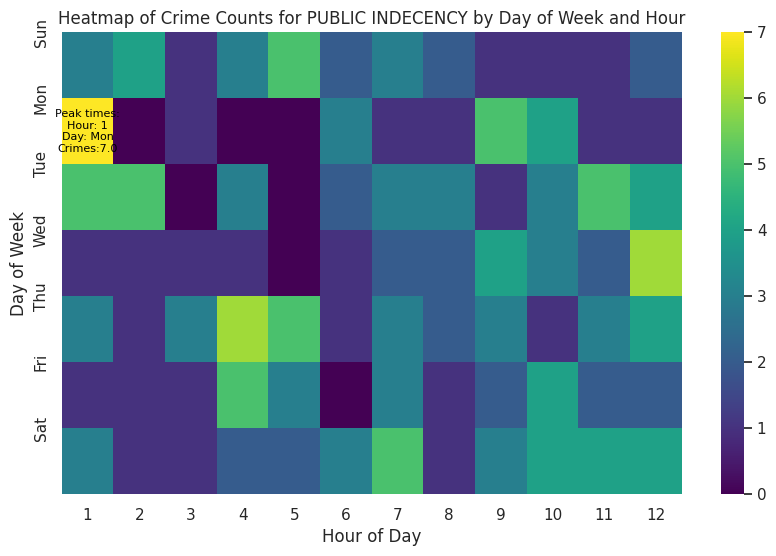

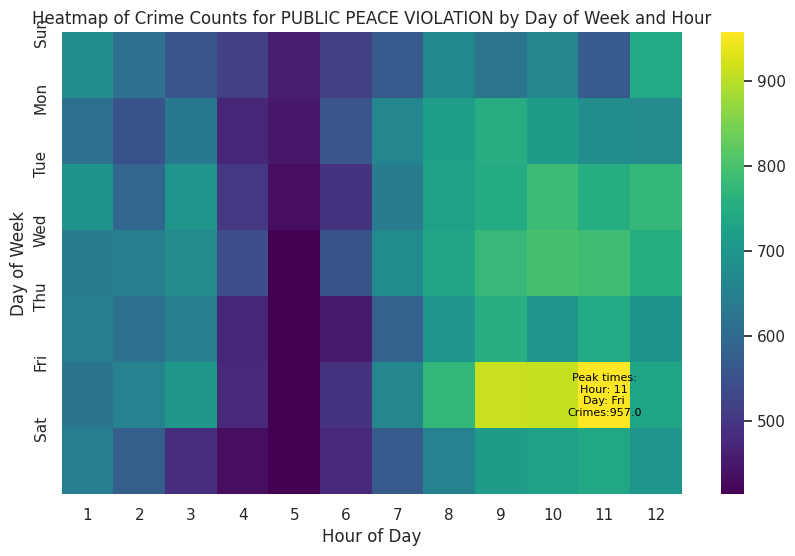

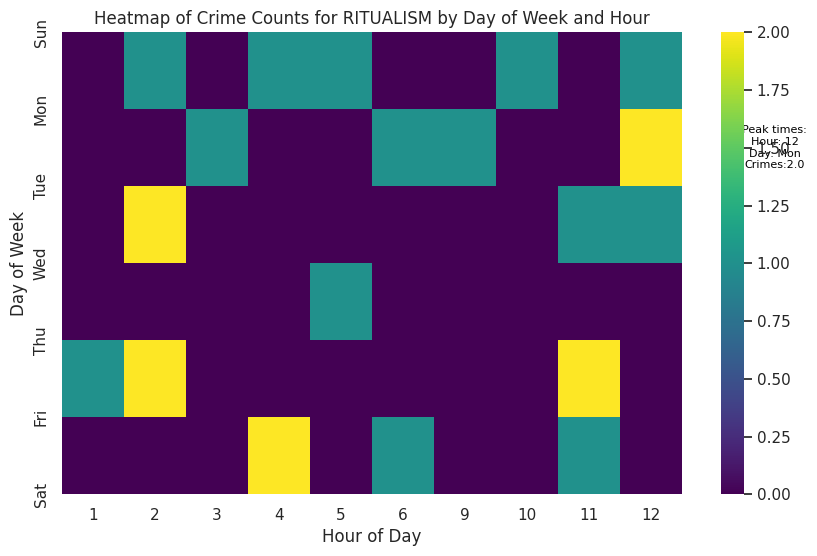

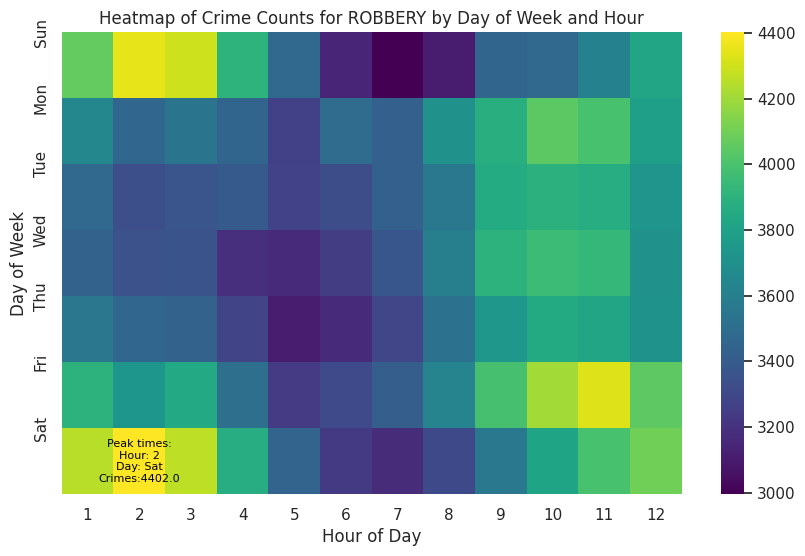

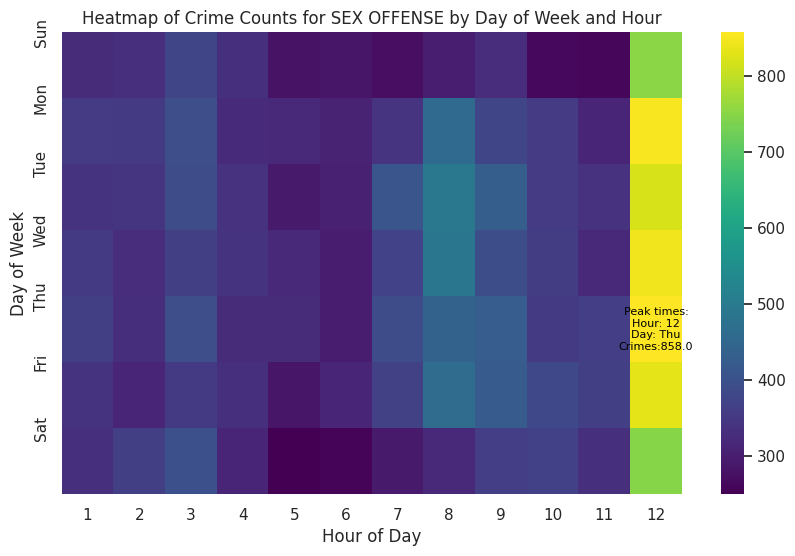

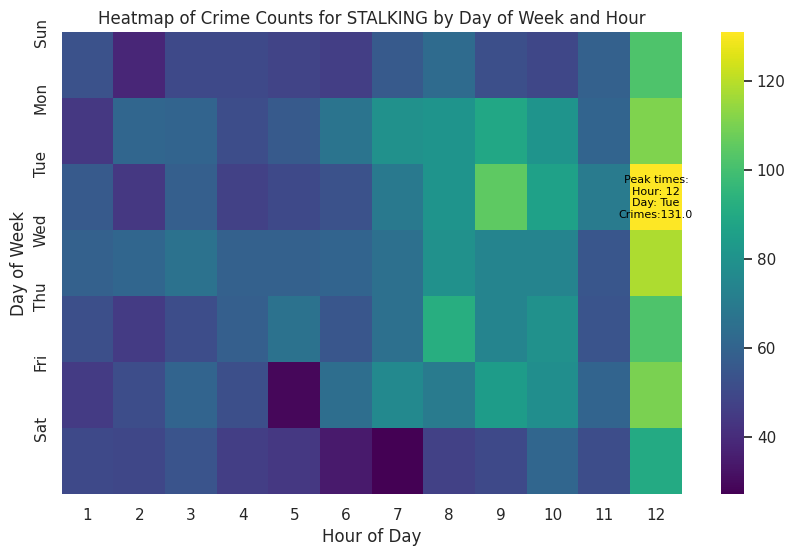

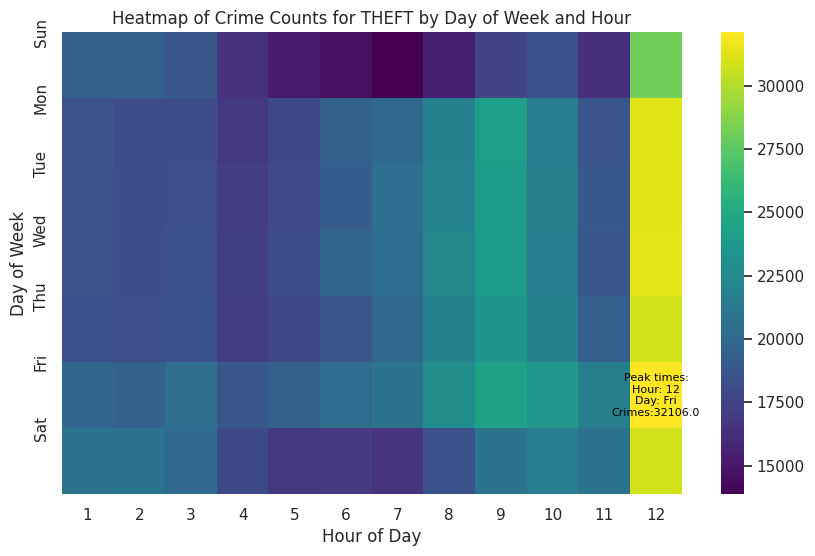

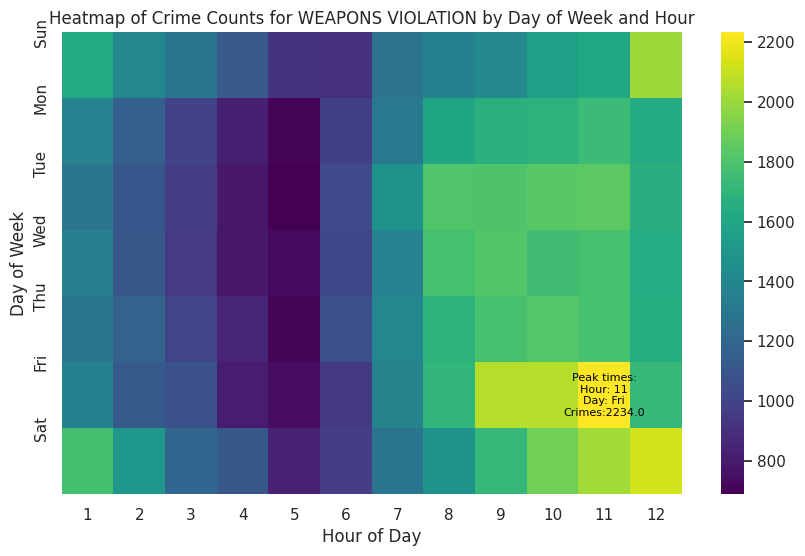

In [37]:
# Question 1 : 1c)Plotting the Peak times for different types of crimes during the day and week

# List of unique crime types
crime_types1 = df1c['primary_type'].unique()

# Function to create heatmap for each crime type
def plot_heatmap_for_crime_type(crime_type):
    df_filtered1 = df1c[df1c['primary_type'] == crime_type]
    pivot_table = df_filtered1.pivot_table(
        values='crime_count',
        index='day_of_week',
        columns='hour',
        aggfunc='sum'
    ).fillna(0)

    pivot_table = pivot_table.astype(float)

    # Find peak time
    peak_time = pivot_table.stack().idxmax()
    peak_day = peak_time[0]
    peak_hour = peak_time[1]
    peak_count = pivot_table.loc[peak_day, peak_hour]

    plt.figure(figsize=(10, 6))
    ax = sns.heatmap(pivot_table, cmap='viridis')
    plt.title(f'Heatmap of Crime Counts for {crime_type} by Day of Week and Hour')
    plt.xlabel('Hour of Day')
    plt.ylabel('Day of Week')

    # Setting y-ticks and labels manually
    ax.set_yticks(range(7))  # 0 to 6 for Sunday to Saturday
    ax.set_yticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

    # Annotate peak time
    ax.text(peak_hour - 0.5, peak_day - 0.5, f'Peak times:\nHour: {peak_hour}\nDay: {["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"][peak_day-1]}\nCrimes:{peak_count}',
            horizontalalignment='center', verticalalignment='center', fontsize=8, color='Black')

    plt.show()

# Plot heatmap for each crime type
for crime_type in crime_types1:
    plot_heatmap_for_crime_type(crime_type)

In [38]:
# Define the SQL query
# Question 2 : Average response time for police to arrive at a crime scene

query2 = """ WITH crime_with_response_time AS (
  SELECT
    primary_type,
    TIMESTAMP_DIFF(updated_on, date, MINUTE) AS response_time
  FROM
    `bigquery-public-data.chicago_crime.crime`
  WHERE
    date IS NOT NULL AND updated_on IS NOT NULL
)

SELECT
  primary_type,
  COUNT(*) AS total_incidents,
  AVG(response_time) AS avg_response_time
FROM
  crime_with_response_time
GROUP BY
  primary_type
ORDER BY
  avg_response_time DESC """

# Execute the query via the client
query_job = client.query(query2)

# Get the result
results = query_job.result()

# Convert the query result to a pandas DataFrame
df2 = results.to_dataframe()

# Display the DataFrame
print(df2)

                         primary_type  total_incidents  avg_response_time
0                   DOMESTIC VIOLENCE                1       7.676672e+06
1                           RITUALISM               24       6.688469e+06
2                        PROSTITUTION            70057       5.609700e+06
3                            GAMBLING            14639       5.166466e+06
4                LIQUOR LAW VIOLATION            15117       5.164064e+06
5                          KIDNAPPING             7363       5.083614e+06
6                            HOMICIDE            13234       4.963974e+06
7                           NARCOTICS           753963       4.833767e+06
8                   CRIMINAL TRESPASS           219555       4.415841e+06
9                 CRIM SEXUAL ASSAULT            27477       4.265649e+06
10                           BURGLARY           432777       4.236723e+06
11                            BATTERY          1473971       4.185578e+06
12                       INTIMIDATION 

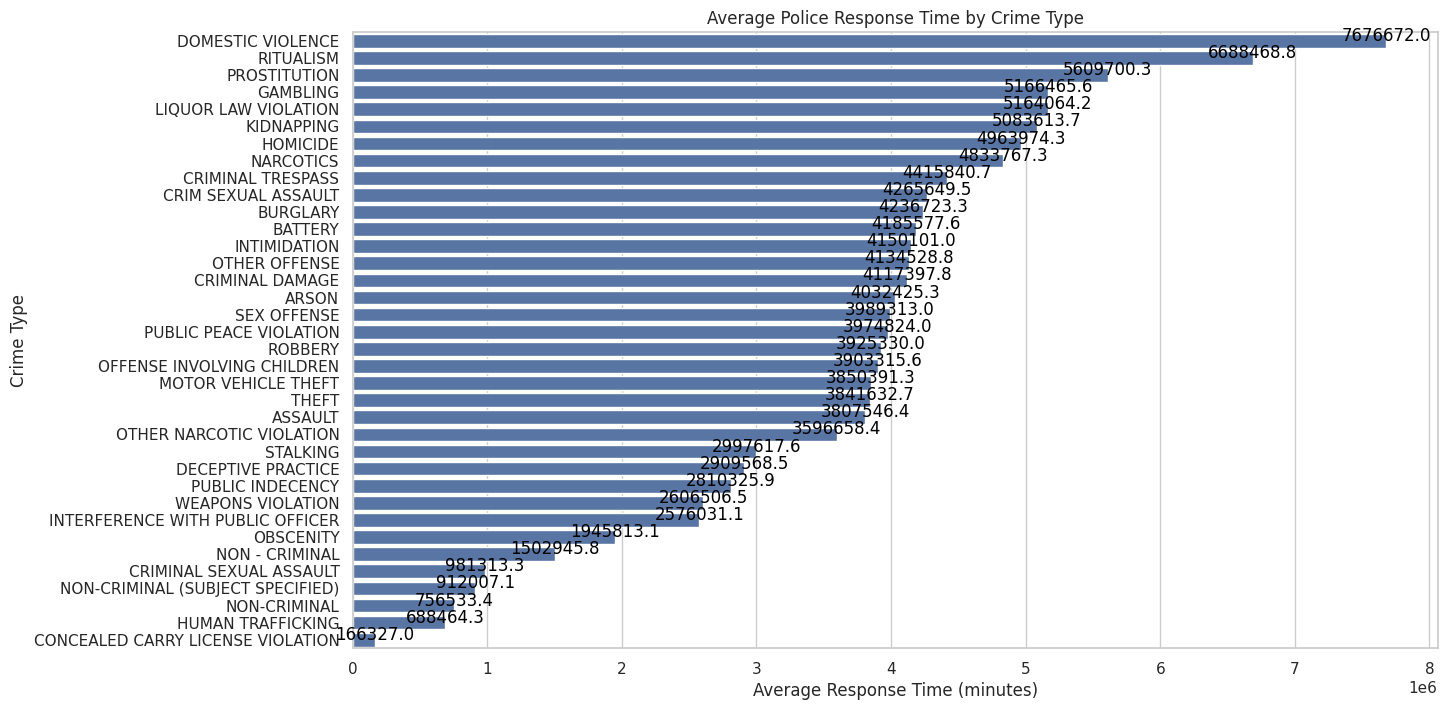

In [39]:
# Question 2 : Plotting the average response time by crime type

plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='avg_response_time', y='primary_type', data=df2)
bar_plot.set_title('Average Police Response Time by Crime Type')
bar_plot.set_xlabel('Average Response Time (minutes)')
bar_plot.set_ylabel('Crime Type')

# Adding text annotations for the average response time values
for index, row in df2.iterrows():
    bar_plot.text(row['avg_response_time'], index, f'{row["avg_response_time"]:.1f}',
                  color='black', ha="center")

# Show the plot
plt.show()

In [40]:
# Define the SQL query
# Question 3 : Most common types of crimes reported for Violent and Property crimes

query3 = """ SELECT
    CASE
        WHEN primary_type IN ('HOMICIDE', 'ASSAULT', 'ROBBERY', 'BATTERY') THEN 'Violent crime'
        WHEN primary_type IN ('BURGLARY', 'LARCENY', 'MOTOR VEHICLE THEFT') THEN 'Property crime'
    END AS crime_category,
    COUNT(*) AS crime_count
FROM
    `bigquery-public-data.chicago_crime.crime`
    where primary_type IN ('HOMICIDE', 'ASSAULT', 'ROBBERY', 'BATTERY','BURGLARY', 'LARCENY', 'MOTOR VEHICLE THEFT')

GROUP BY
  crime_category, primary_type

ORDER BY
  crime_category, crime_count DESC """

# Execute the query via the client
query_job = client.query(query3)

# Get the result
results = query_job.result()

# Convert the query result to a pandas DataFrame
df3 = results.to_dataframe()

# Display the DataFrame
print(df3)

   crime_category  crime_count
0  Property crime       432777
1  Property crime       404910
2   Violent crime      1473971
3   Violent crime       533399
4   Violent crime       304454
5   Violent crime        13234


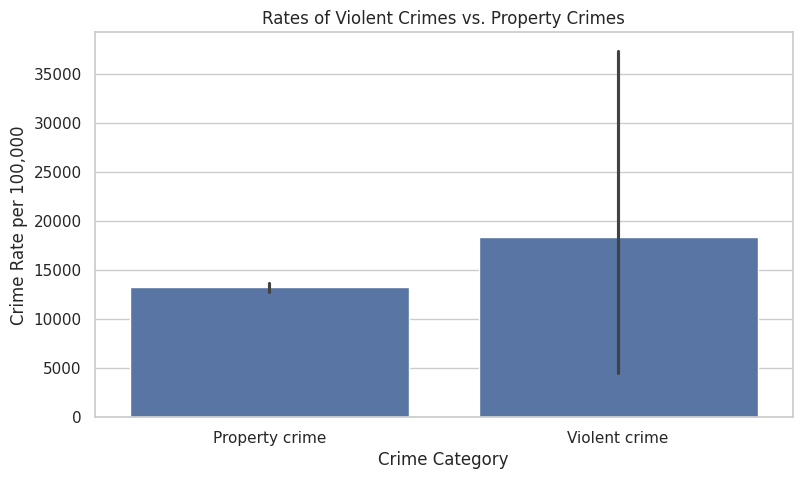

In [41]:
# Question 3 : Plot for Rates of violent crimes vs. property crimes

total_crimes = df3['crime_count'].sum()
df3['crime_rate'] = (df3['crime_count'] / total_crimes) * 100000  # Rate per 100,000 for demonstration

# Plotting the graph
sns.set(style="whitegrid")
plt.figure(figsize=(9, 5))
bar_plot = sns.barplot(x='crime_category', y='crime_rate', data=df3)
bar_plot.set_title('Rates of Violent Crimes vs. Property Crimes')
bar_plot.set_ylabel('Crime Rate per 100,000')
bar_plot.set_xlabel('Crime Category')

# Show the plot
plt.show()